In [3996]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

In [3997]:
pip install odfpy

Note: you may need to restart the kernel to use updated packages.


In [4042]:
file_path = '/home/ab/Desktop/MASTER DSEF/Dogecoin Historical Data_.ods'
db = pd.read_excel(file_path)

In [4043]:
db

,Date,Price,Open,High,Low,Vol.,Change %
0,01/17/2025,0.411821,0.376295,0.420669,0.375585,3.84B,9.43%
1,01/16/2025,0.376325,0.385484,0.389726,0.368338,2.84B,-2.39%
2,01/15/2025,0.385528,0.355792,0.387567,0.348547,2.92B,8.36%
3,01/14/2025,0.355792,0.338159,0.361556,0.335892,2.42B,5.21%
4,01/13/2025,0.338160,0.335841,0.345686,0.311998,2.74B,0.69%
...,...,...,...,...,...,...,...
2781,06/07/2017,0.003250,0.003617,0.003950,0.003132,1.37M,-10.15%
2782,06/06/2017,0.003617,0.003718,0.003718,0.003152,2.11M,-2.72%
2783,06/05/2017,0.003718,0.003770,0.003825,0.002923,4.82M,-1.38%
2784,06/04/2017,0.003770,0.003213,0.003770,0.002544,5.96M,17.34%


In [4044]:
# Convertir la colonne 'Date' en format datetime en utilisant le format correct
db['Date'] = pd.to_datetime(db['Date'], format='%m/%d/%Y')

# Inverser l'ordre des données (de la plus ancienne à la plus récente)
data = db.iloc[::-1].reset_index(drop=True)

# Vérifier les premières lignes après l'inversion
data

,Date,Price,Open,High,Low,Vol.,Change %
0,2017-06-03,0.003213,0.002803,0.003398,0.002655,4.37M,14.63%
1,2017-06-04,0.003770,0.003213,0.003770,0.002544,5.96M,17.34%
2,2017-06-05,0.003718,0.003770,0.003825,0.002923,4.82M,-1.38%
3,2017-06-06,0.003617,0.003718,0.003718,0.003152,2.11M,-2.72%
4,2017-06-07,0.003250,0.003617,0.003950,0.003132,1.37M,-10.15%
...,...,...,...,...,...,...,...
2781,2025-01-13,0.338160,0.335841,0.345686,0.311998,2.74B,0.69%
2782,2025-01-14,0.355792,0.338159,0.361556,0.335892,2.42B,5.21%
2783,2025-01-15,0.385528,0.355792,0.387567,0.348547,2.92B,8.36%
2784,2025-01-16,0.376325,0.385484,0.389726,0.368338,2.84B,-2.39%


In [4045]:
# Suppression de la dernière ligne
#data = data[:-1]

In [4046]:
#data

In [4047]:
date_column = 'Date'
close_column = 'Price'

In [4048]:
print(data.columns)

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


In [4049]:
dates = pd.to_datetime(data[date_column])
close_prices = data[close_column]

In [4050]:
# Décomposition en ondelettes
coeffs = pywt.wavedec(close_prices, 'db1', level=2)
cA2, cD2, cD1 = coeffs

In [4051]:
approximation = pywt.upcoef('a', cA2, 'db1', level=2, take=len(close_prices))
detail2 = pywt.upcoef('d', cD2, 'db1', level=2, take=len(close_prices))
detail1 = pywt.upcoef('d', cD1, 'db1', level=1, take=len(close_prices))

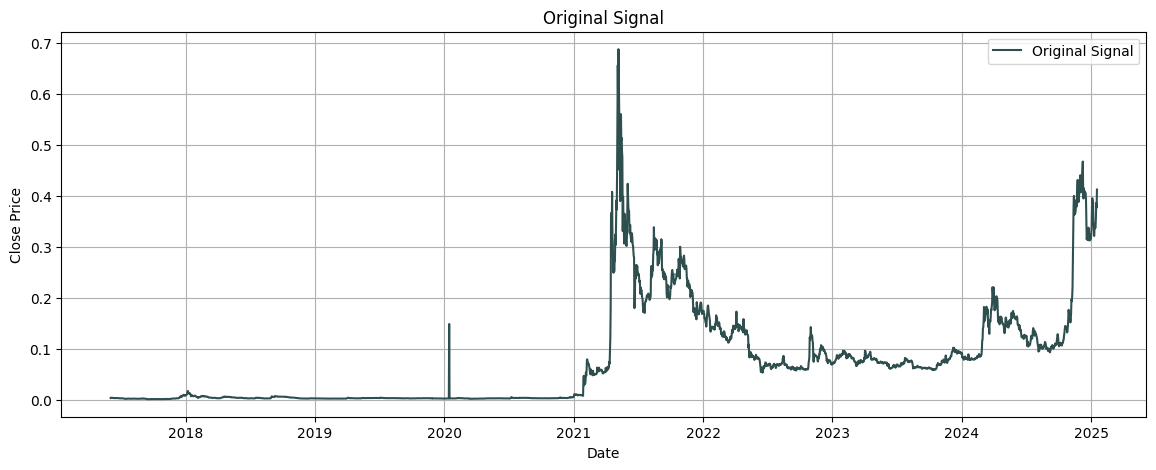

In [4052]:
# Tracer le signal original
plt.figure(figsize=(14, 5))
plt.plot(dates, close_prices, label='Original Signal', color='darkslategrey')
plt.title('Original Signal')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

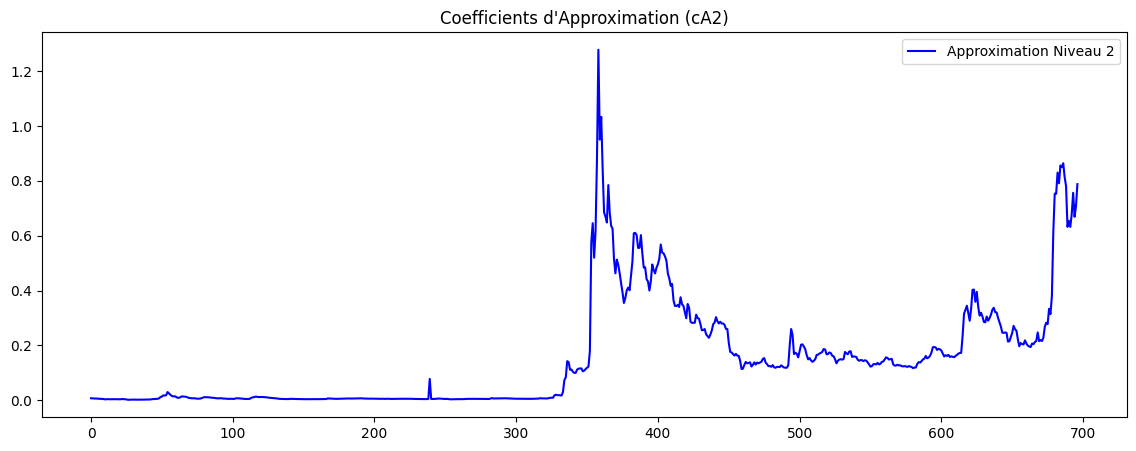

In [4053]:
plt.figure(figsize=(14, 5))
plt.plot(cA2, label='Approximation Niveau 2', color='blue')
plt.title('Coefficients d\'Approximation (cA2)')
plt.legend()
plt.show()

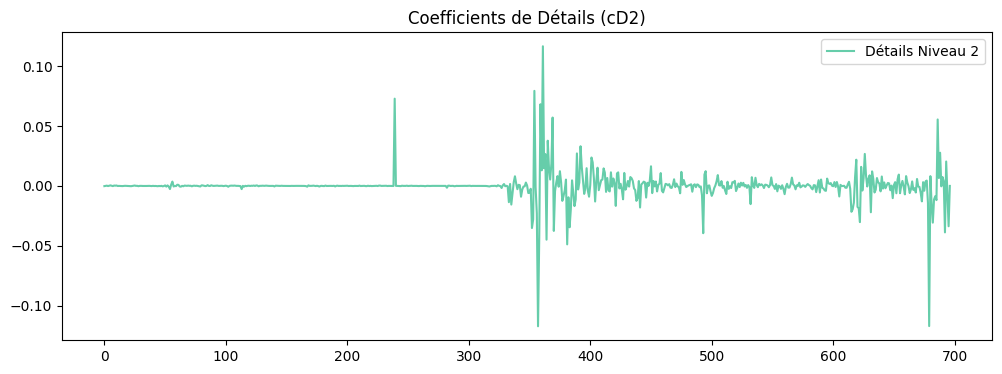

In [4054]:
plt.figure(figsize=(12, 4))
plt.plot(cD2, label='Détails Niveau 2', color='mediumaquamarine')
plt.title('Coefficients de Détails (cD2)')
plt.legend()
plt.show()

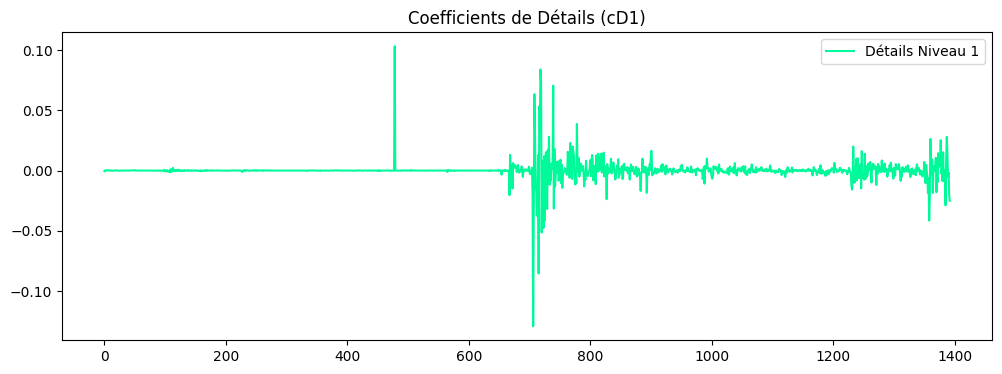

In [4055]:
plt.figure(figsize=(12, 4))
plt.plot(cD1, label='Détails Niveau 1', color='mediumspringgreen')
plt.title('Coefficients de Détails (cD1)')
plt.legend()
plt.show()

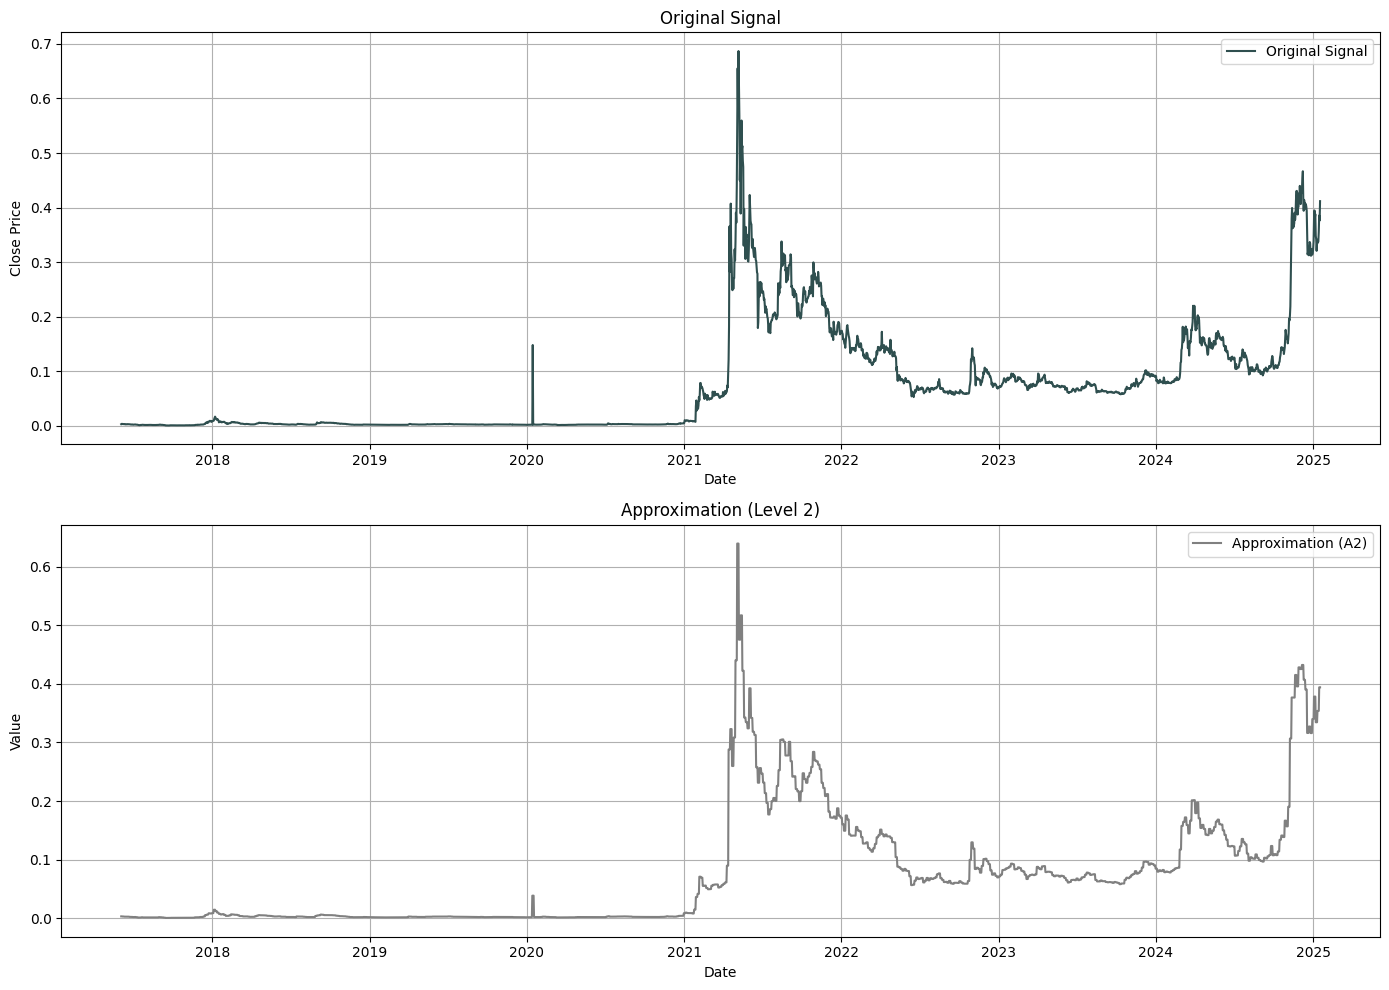

In [4056]:
fig1, axs1 = plt.subplots(2, 1, figsize=(14, 10))

# Tracer le signal original
axs1[0].plot(dates, close_prices, label='Original Signal', color='darkslategrey')
axs1[0].set_title('Original Signal')
axs1[0].set_xlabel('Date')
axs1[0].set_ylabel('Close Price')
axs1[0].legend()
axs1[0].grid(True)

axs1[1].plot(dates, approximation, label='Approximation (A2)', color='grey')
axs1[1].set_title('Approximation (Level 2)')
axs1[1].set_xlabel('Date')
axs1[1].set_ylabel('Value')
axs1[1].legend()
axs1[1].grid(True)

plt.tight_layout()
plt.show()

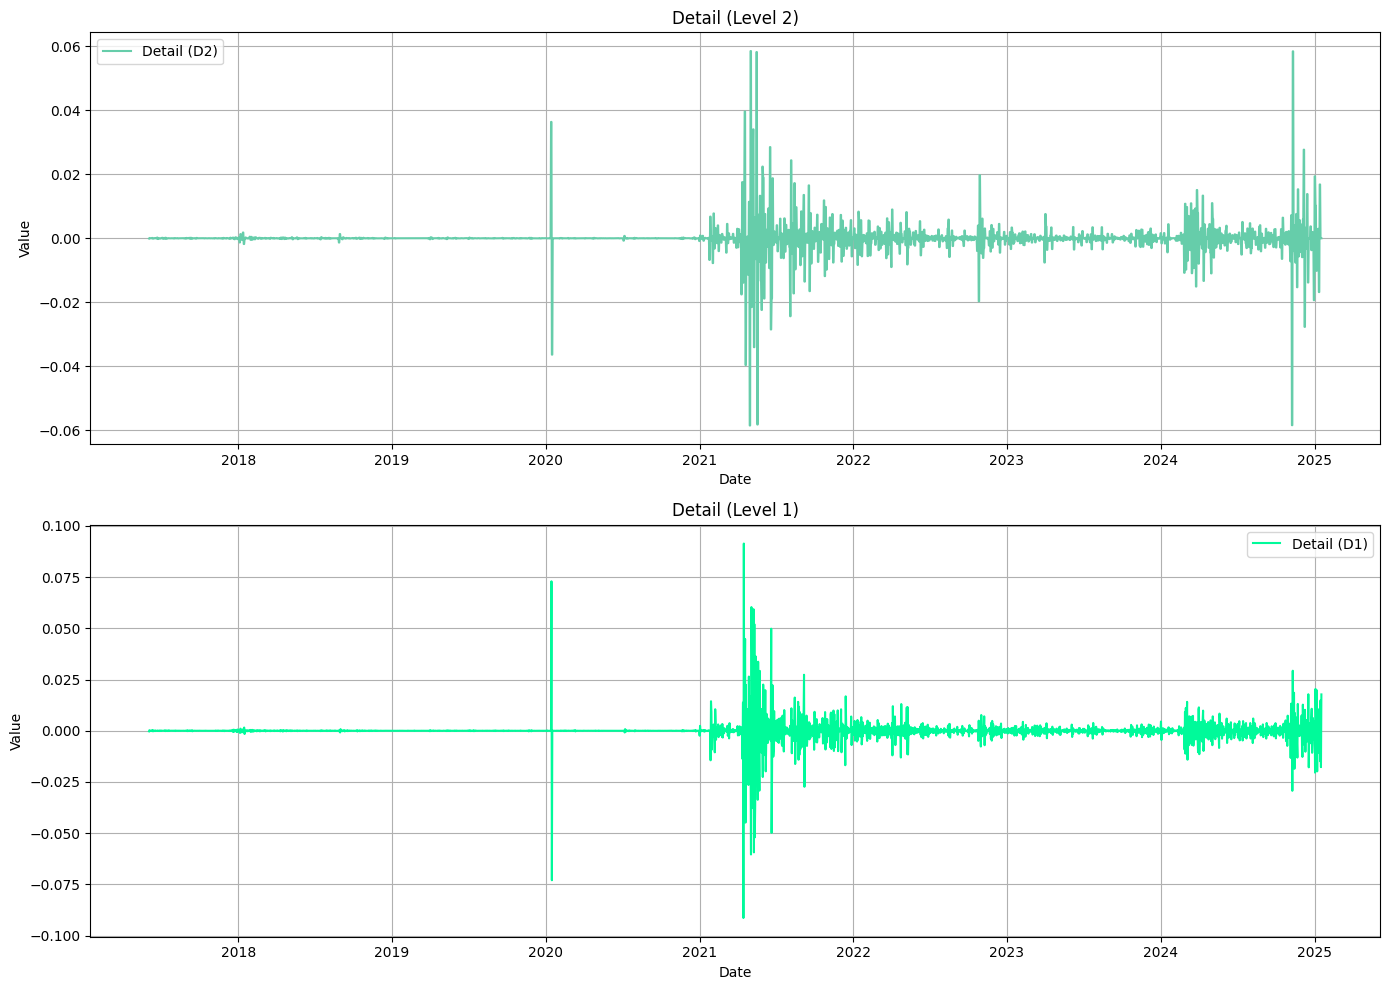

In [4057]:
fig2, axs2 = plt.subplots(2, 1, figsize=(14, 10))

axs2[0].plot(dates, detail2, label='Detail (D2)', color='mediumaquamarine')
axs2[0].set_title('Detail (Level 2)')
axs2[0].set_xlabel('Date')
axs2[0].set_ylabel('Value')
axs2[0].legend()
axs2[0].grid(True)

axs2[1].plot(dates, detail1, label='Detail (D1)', color='mediumspringgreen')
axs2[1].set_title('Detail (Level 1)')
axs2[1].set_xlabel('Date')
axs2[1].set_ylabel('Value')
axs2[1].legend()
axs2[1].grid(True)

plt.tight_layout()
plt.show()

In [4058]:
# Diviser le signal detail1 en plusieurs parties
split_dates = [
    pd.Timestamp('2024-01-05'),
    pd.Timestamp('2024-01-10'),
    pd.Timestamp('2024-08-15'),
    pd.Timestamp('2024-11-03')
]

In [4059]:
# Indices des dates de séparation
indices = [0] + [np.searchsorted(dates, split_date) for split_date in split_dates] + [len(dates)]

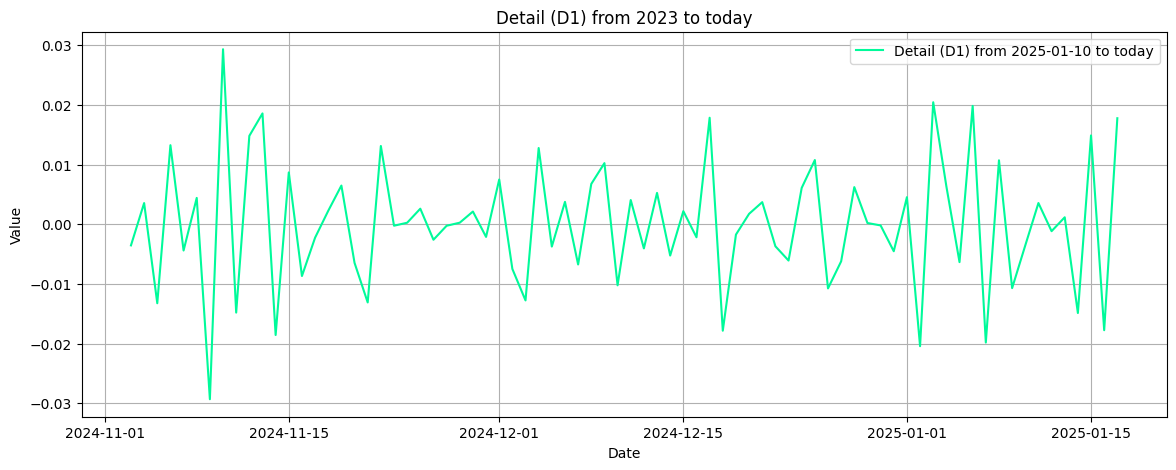

In [4060]:
# Detail (D1) from 2023 to today
plt.figure(figsize=(14, 5))
plt.plot(dates[indices[4]:indices[5]], detail1[indices[4]:indices[5]], label='Detail (D1) from 2025-01-10 to today', color='mediumspringgreen')
plt.title('Detail (D1) from 2023 to today')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

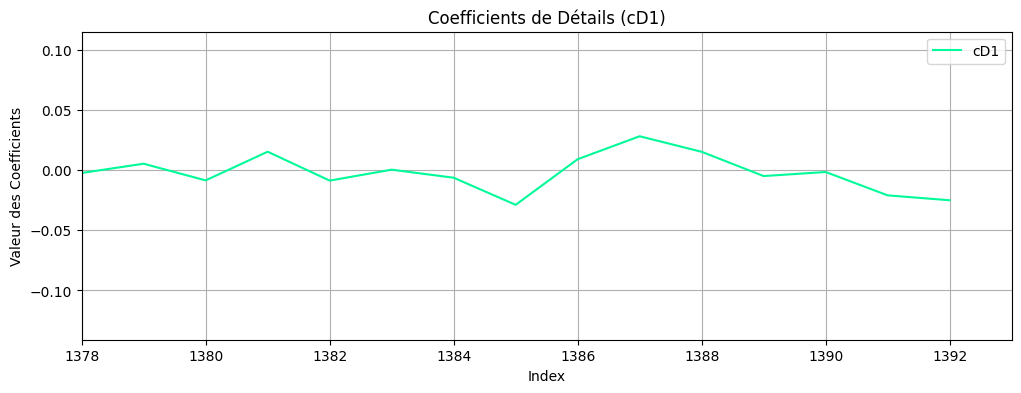

In [4061]:
# Afficher les coefficients de détails cD1
plt.figure(figsize=(12, 4))
plt.plot(cD1, label='cD1', color='mediumspringgreen')
plt.title('Coefficients de Détails (cD1)')
plt.xlabel('Index')
plt.ylabel('Valeur des Coefficients')
plt.legend()
plt.xlim(len(cD1)-15, len(cD1))  # Zoomer sur les derniers 100 points (ajustez ce nombre)
plt.grid(True)
plt.show()

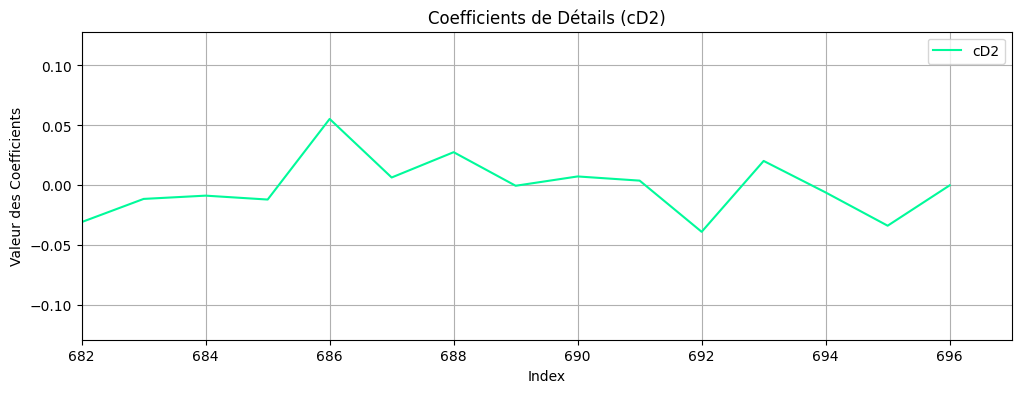

In [4062]:
# Afficher les coefficients de détails cD1
plt.figure(figsize=(12, 4))
plt.plot(cD2, label='cD2', color='mediumspringgreen')
plt.title('Coefficients de Détails (cD2)')
plt.xlabel('Index')
plt.ylabel('Valeur des Coefficients')
plt.legend()
plt.xlim(len(cD2)-15, len(cD2))  # Zoomer sur les derniers 100 points (ajustez ce nombre)
plt.grid(True)
plt.show()

In [4063]:
# On peut meme mesurer la quantite d'une couleur sur une periode determinee par sa presence.

In [4064]:
len(cD1)

1393

In [4065]:
print(f"Taille du detail1: {len(detail1)}")
print(f"Taille du detail2: {len(detail2)}")
print(f"Taille de approximation: {len(approximation)}")
print(f"Taille de cD1: {len(cD1)}")
print(f"Taille de cD2: {len(cD2)}")
print(f"Taille de cA2: {len(cA2)}")

Taille du detail1: 2786
Taille du detail2: 2786
Taille de approximation: 2786
Taille de cD1: 1393
Taille de cD2: 697
Taille de cA2: 697


In [4066]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# Normalisation des données
scaler = MinMaxScaler(feature_range=(0, 1))
cD1_scaled = scaler.fit_transform(cD1.reshape(-1, 1))

# Création des fenêtres temporelles
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size, 0])  # Séquence des données passées
        y.append(data[i+window_size, 0])  # Prochaine valeur (target)
    return np.array(X), np.array(y)

window_size = 10  # Utilisez les 10 dernières valeurs pour prédire la suivante
X, y = create_dataset(cD1_scaled, window_size)

# Reshape des données pour LSTM [échantillons, timesteps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [4067]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Définition du modèle LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))  # Une seule sortie (la prochaine valeur de cD1)

# Compilation du modèle
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraînement du modèle
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20


/home/ab/Desktop/qiskit-env/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1687
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011   
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019 
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025
Epoch 9/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011   
Epoch 10/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0019
Epoch 11/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015  
Epoch 12/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0019  
Epoch 13/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017
Epoch 14/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013  
Epoch 15/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015
Epoch 16/20
35/35

In [4068]:
# Prédire la prochaine valeur de cD1 à partir de la dernière fenêtre de test
predicted_value_cD1 = model.predict(X_test[-1].reshape(1, window_size, 1))

# Inverse de la normalisation pour obtenir la valeur réelle
predicted_value_rescaled_cD1 = scaler.inverse_transform(predicted_value_cD1)

# Affichage de la valeur prédite
print(f"Prochaine valeur prédite pour cD1 : {predicted_value_rescaled_cD1[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
Prochaine valeur prédite pour cD1 : 0.0008052726625464857


In [4069]:
cD1

array([-3.93858477e-04,  7.14177849e-05, -1.27986327e-04, ...,
       -1.64402327e-03, -2.10265272e-02, -2.50994623e-02])

In [4070]:
predicted_value_rescaled_cD1

array([[0.00080527]], dtype=float32)

In [4071]:
predicted_value_cD1

array([[0.5595421]], dtype=float32)

In [4072]:
# Dernière valeur de cA1 (approximation à un certain niveau)
last_cD1_value = cD1[-1]  # Dernière valeur de cA1

# Valeur prédite rééchelonnée (prédiction pour le prochain point)
predicted_value_rescaled_cD1 = predicted_value_rescaled_cD1[0][0]

# Comparaison entre la dernière valeur de cA1 et la valeur prédite
if predicted_value_rescaled_cD1 > last_cD1_value:
    print("Le signal devrait augmenter.")
else:
    print("Le signal devrait diminuer.")

Le signal devrait augmenter.


In [4073]:
# Normalisation des données pour cD2
scaler = MinMaxScaler(feature_range=(0, 1))
cD2_scaled = scaler.fit_transform(cD2.reshape(-1, 1))  # Remplacez cD2 par vos données de cD2

# Création des fenêtres temporelles pour cD2
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size, 0])  # Séquence des données passées
        y.append(data[i+window_size, 0])  # Prochaine valeur (target)
    return np.array(X), np.array(y)

window_size = 10  # Utilisez les 10 dernières valeurs pour prédire la suivante
X, y = create_dataset(cD2_scaled, window_size)

# Reshape des données pour LSTM [échantillons, timesteps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Définition du modèle LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))  # Une seule sortie (la prochaine valeur de cD2)

# Compilation du modèle
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraînement du modèle
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Prédire la prochaine valeur de cD2 à partir de la dernière fenêtre de test
predicted_value_cD2 = model.predict(X_test[-1].reshape(1, window_size, 1))

# Inverse de la normalisation pour obtenir la valeur réelle
predicted_value_rescaled_cD2 = scaler.inverse_transform(predicted_value_cD2)

# Affichage de la valeur prédite
print(f"Prochaine valeur prédite pour cD2 : {predicted_value_rescaled_cD2[0][0]}")

/home/ab/Desktop/qiskit-env/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1858
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0131
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023   
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0038
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0032
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0027
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0023
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0023
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0026
Epoch 13/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0027
Epoch 14/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0022   
Epoch 15/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0023   
Epoch

In [4074]:
predicted_value_rescaled_cD2

array([[0.00217984]], dtype=float32)

In [4075]:
predicted_value_cD2

array([[0.5106342]], dtype=float32)

In [4076]:
cD2

array([-1.760000e-04, -1.150000e-05,  2.165000e-04, -1.230000e-04,
        1.610000e-04,  4.425000e-04,  1.225000e-04, -1.640000e-04,
        3.025000e-04,  2.180000e-04,  3.365000e-04, -7.200000e-05,
        5.000000e-06, -3.350000e-05, -1.250000e-05, -1.390000e-04,
        2.000000e-06,  8.650000e-05, -4.500000e-06, -2.750000e-05,
       -6.400000e-05, -8.900000e-05, -2.255000e-04, -2.050000e-05,
        2.640000e-04,  3.290000e-04,  3.700000e-05,  8.200000e-05,
       -2.310000e-04,  5.500000e-06,  4.500000e-05, -3.550000e-05,
       -5.600000e-05, -7.200000e-05,  4.500000e-06, -3.850000e-05,
        4.150000e-05,  3.450000e-05, -4.750000e-05, -1.355000e-04,
        5.400000e-05, -9.250000e-05, -3.350000e-05, -1.175000e-04,
       -2.405000e-04, -3.950000e-05, -1.730000e-04,  4.550000e-05,
       -3.710000e-04, -1.020000e-04,  4.345000e-04, -5.945000e-04,
        4.365000e-04, -5.700000e-04, -2.620000e-03,  1.092000e-03,
        3.603000e-03, -4.980000e-04, -2.000000e-05, -1.670000e

In [4077]:
# Dernière valeur de cA1 (approximation à un certain niveau)
last_cD2_value = cD2[-1]  # Dernière valeur de cD2

# Valeur prédite rééchelonnée (prédiction pour le prochain point)
predicted_value_rescaled_cD2 = predicted_value_rescaled_cD2[0][0]

# Comparaison entre la dernière valeur de cA1 et la valeur prédite
if predicted_value_rescaled_cD2 > last_cD2_value:
    print("Le signal devrait augmenter.")
else:
    print("Le signal devrait diminuer.")


Le signal devrait augmenter.


In [4078]:
last_cD2_value

0.0

In [4079]:
predicted_value_rescaled_cD2

0.0021798369

In [4080]:
last_cD1_value

-0.02509946230499771

In [4081]:
predicted_value_rescaled_cD1

0.00080527266

In [4082]:
last_cD2_value < predicted_value_rescaled_cD2 # True is Buy

True

In [4083]:
last_cD1_value <  predicted_value_rescaled_cD1

True

In [4084]:
# Définir les valeurs à comparer
last_cD2_value = cD2[-1]  # Dernière valeur de cD2
last_cD1_value = cD1[-1]  # Dernière valeur de cD1
predicted_value_rescaled_cD1 = predicted_value_rescaled_cD1  # Prédiction pour cD1
predicted_value_rescaled_cD2 = predicted_value_rescaled_cD2  # Prédiction pour cD2

# Condition pour Achat, Vente ou Neutre
if last_cD2_value < predicted_value_rescaled_cD2 and last_cD1_value < predicted_value_rescaled_cD1:
    print("Achat")
elif last_cD2_value >= predicted_value_rescaled_cD2 and last_cD1_value >= predicted_value_rescaled_cD2:
    print("N'achetez pas") # vente
else:
    print("N'achetez pas") # neutre

Achat


In [4085]:
# Dec 29, 2024 _ 20